In [78]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: dada2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘dada2’”


In [4]:
meta=fread("~/Documents/DE/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [5]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [6]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negcounts[,colSums(negcounts)>0]
remove=negcounts[,colSums(negcounts)>0]

TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                             
2019____EC_02_BAC  0                                                                                                                                                                                                                                                             
Neg1              20                                                                                                                                                                                                                                                             
Neg2               7                                                                                                                                                                                                                                                             
Neg3              22                                                                                                                                                                                                                                                             
Neg4              17                                                                                                                                                                                                                                                             
                  TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                          
2019____EC_02_BAC  0                                                                                                                                                                                                                                                          
Neg1               2                                                                                                                                                                                                                                                          
Neg2              12                                                                                                                                                                                                                                                          
Neg3              16                                                                                                                                                                                                                                                          
Neg4               6                                                                                                                                                                                                                                                          
                  TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGC

In [ ]:
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [7]:
NCOL(asv_all)

[1] 16383

In [8]:
meta$Experiment

[1] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
  [6] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [11] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [16] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [21] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [26] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [31] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [36] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [41] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [46] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [51] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [56] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [61] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [66] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [71] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [76] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [81] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [86] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [91] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
 [96] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[101] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[106] "Field17"     "Field17"     "Field17"     "Field17"     "Field17"    
[111] "Field17"     "Field17"     "Lab18"       "Lab18"       "Lab18"      
[116] "Lab18"       "Negative"    "Negative"    "Negative"    "Negative"   
[121] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[126] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[131] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[136] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[141] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[146] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[151] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[156] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[161] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[166] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[171] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[176] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[181] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[186] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[191] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[196] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[201] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[206] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[211] "Lab18"       "Lab18"       "Lab18"       "Lab18"       "Lab18"      
[216] "Lab18"       "Lab18"       "CE18"        "CE18"        "CE18"       
[221] "CE18"        "CE18"        "CE18"        "CE18"        "CE18"       
[226] "CE18"        "CE18"        "CE18"        "CE18"        "CE18"       
[231] "CE18"        "CE18"        "CE18"        "Riverkeeper" "Riverkeeper"
[236] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[241] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[246] "Riverkeeper" "Negative"    "Riverkeeper" "Riverkeeper" "Riverkeeper"
[251] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[256] "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper" "Riverkeeper"
[261] "Riverkeeper" "Riverkeeper" "Riverkeeper" "R

In [9]:
#pull out the Carryover effect samples
meta_ce=as.data.frame(meta[meta$Experiment=="CE18",])

In [10]:
asv_ce=asv_all[rownames(asv_all) %in% meta_ce$UniqueID,]

In [11]:
asv_ce=asv_ce[,colSums(asv_ce)>0]

In [12]:
head(asv_ce)

TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
2018__BBO_BBY_B27_CV    0                                                                                                                                                                                                                                                           
2018__BBR_BBB_B50_CV 1088                                                                                                                                                                                                                                                           
2018__BBR_BBG_B38_CV    0                                                                                                                                                                                                                                                           
2018__BBR_BBY_B26_CV    3                                                                                                                                                                                                                                                           
2018__BPR_BPG_O38_CV   13                                                                                                                                                                                                                                                           
2018__BPR_BPR_O02_CV    0                                                                                                                                                                                                                                                           
                     TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG
2018__BBO_BBY_B27_CV 5                                                                                                                                                                                                                                                            
2018__BBR_BBB_B50_CV 0                                                                                                                                                                                                                                                            
2018__BBR_BBG_B38_CV 4                                                                                                                                                                                                                                                            
2018__BBR_BBY_B26_CV 0                                                                                                                                                                                                                                                            
2018__BPR_BPG_O38_CV 0                                                                                                                                                                                                                                                            
2018__BPR_BPR_O02_CV 0                                                                                                                                                                                                                                                            
                     TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGG

In [13]:
taxa_ce=taxa[rownames(taxa)%in% colnames(asv_ce),]

In [14]:
taxa_ce=as.matrix(taxa_ce)

In [15]:
head(taxa_ce)

Kingdom  
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          Bacteria 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                            Bacteria 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                          Bacteria 
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG                                                                                                                                                                            Bacteria 
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG Eukaryota
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG                                                                                                                                                                            Bacteria 
                                                                                                                                                                                                                                                                                                                                                                                                                                         Phylum        
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          Spirochaetota 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                            Spirochaetota 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAG

In [16]:
head(meta_ce)

V1  UniqueID             Experiment Year Site Treatment1_Density
1 218 2018__WBY_BBY_W30_CV CE18       2018      WBY               
2 219 2018__WBO_BBR_W03_CV CE18       2018      WBO               
3 220 2018__WBY_BBV_W65_CV CE18       2018      WBY               
4 221 2018__WBG_BBB_W56_CV CE18       2018      WBG               
5 222 2018__WPV_BPR_G11_CV CE18       2018      WPV               
6 223 2018__WPO_BPY_G28_CV CE18       2018      WPO               
  Treatment2_Diversity Color_Bucket Number Species RFTM_score peacrabs
1 BBY                               30W    CV      NA         NA      
2 BBR                               03W    CV      NA         NA      
3 BBV                               65W    CV      NA         NA      
4 BBB                               56W    CV      NA         NA      
5 BPR                               11G    CV      NA         NA      
6 BPY                               28G    CV      NA         NA      
  Phase_1_DO Phase_1_temp Phase_2_DO Phase_2_Temp Overall_treatment
1 Normoxic   Ambient      Hypoxic    Ambient      WBBB             
2 Normoxic   Ambient      Hypoxic    Ambient      WBBB             
3 Normoxic   Ambient      Hypoxic    Ambient      WBBB             
4 Normoxic   Ambient      Hypoxic    Ambient      WBBB             
5 Normoxic   Warm         Hypoxic    Warm         WPBP             
6 Normoxic   Warm         Hypoxic    Warm         WPBP

In [17]:
row.names(meta_ce)=meta_ce$UniqueID

In [18]:
OTU = otu_table(t(asv_ce), taxa_are_rows = TRUE)
TAX = tax_table(taxa_ce)
Samp= sample_data(meta_ce)

In [19]:
rownames(meta_ce)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [20]:
sample_names(Samp)

[1] "2018__WBY_BBY_W30_CV" "2018__WBO_BBR_W03_CV" "2018__WBY_BBV_W65_CV"
 [4] "2018__WBG_BBB_W56_CV" "2018__WPV_BPR_G11_CV" "2018__WPO_BPY_G28_CV"
 [7] "2018__WPB_BPG_G45_CV" "2018__WPO_BPO_G16_CV" "2018__BBR_BBB_B50_CV"
[10] "2018__BBR_BBY_B26_CV" "2018__BBR_BBG_B38_CV" "2018__BBO_BBY_B27_CV"
[13] "2018__BPR_BPG_O38_CV" "2018__BPY_BPG_O42_CV" "2018__BPR_BPR_O02_CV"
[16] "2018__BPY_BPY_O29_CV"

In [21]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [22]:
CE = phyloseq(OTU, TAX, Samp)

In [23]:
taxa_names(CE)

[1] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                                                                                                                                                                                              
   [2] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                                
   [3] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                                                                                                                                                                                              
   [4] "TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG"                                                                                                                                                                                                
   [5] "TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG"                     
   [6] "GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG"                                                                                                                                                                                                
   [7] "TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG"                                                                                                                                                                                                
   [8] "TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG"                                                                                                                                                                                                
   [9] "TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG"                                                                                                     

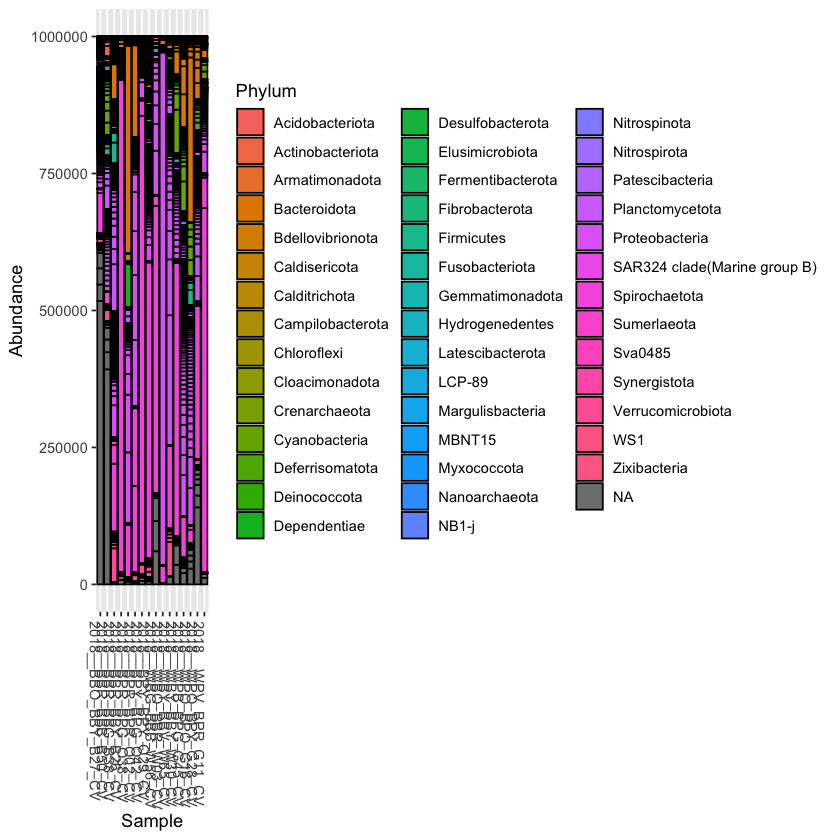

In [24]:
plot_bar(CE, fill = "Phylum")

In [26]:
CE.ord <- ordinate(CE, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1115951 
Run 1 stress 0.1248358 
Run 2 stress 0.1236156 
Run 3 stress 0.1101587 
... New best solution
... Procrustes: rmse 0.03772127  max resid 0.1294243 
Run 4 stress 0.1232517 
Run 5 stress 0.1101587 
... Procrustes: rmse 0.0001298957  max resid 0.0003284503 
... Similar to previous best
Run 6 stress 0.1013789 
... New best solution
... Procrustes: rmse 0.1107724  max resid 0.3241072 
Run 7 stress 0.1236709 
Run 8 stress 0.1303765 
Run 9 stress 0.1307508 
Run 10 stress 0.1266612 
Run 11 stress 0.1354748 
Run 12 stress 0.1013789 
... New best solution
... Procrustes: rmse 5.912962e-06  max resid 1.809422e-05 
... Similar to previous best
Run 13 stress 0.1166475 
Run 14 stress 0.1101587 
Run 15 stress 0.1354747 
Run 16 stress 0.1303765 
Run 17 stress 0.1209208 
Run 18 stress 0.1013789 
... New best solution
... Procrustes: rmse 5.018628e-06  max resid 1.560033e-05 
... Similar to previous best
Run 19 stress 0.

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [27]:
(CE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2968 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 2968 taxa by 6 taxonomic ranks ]

In [28]:
head(meta_ce)

V1  UniqueID             Experiment Year Site
2018__WBY_BBY_W30_CV 218 2018__WBY_BBY_W30_CV CE18       2018     
2018__WBO_BBR_W03_CV 219 2018__WBO_BBR_W03_CV CE18       2018     
2018__WBY_BBV_W65_CV 220 2018__WBY_BBV_W65_CV CE18       2018     
2018__WBG_BBB_W56_CV 221 2018__WBG_BBB_W56_CV CE18       2018     
2018__WPV_BPR_G11_CV 222 2018__WPV_BPR_G11_CV CE18       2018     
2018__WPO_BPY_G28_CV 223 2018__WPO_BPY_G28_CV CE18       2018     
                     Treatment1_Density Treatment2_Diversity Color_Bucket
2018__WBY_BBY_W30_CV WBY                BBY                              
2018__WBO_BBR_W03_CV WBO                BBR                              
2018__WBY_BBV_W65_CV WBY                BBV                              
2018__WBG_BBB_W56_CV WBG                BBB                              
2018__WPV_BPR_G11_CV WPV                BPR                              
2018__WPO_BPY_G28_CV WPO                BPY                              
                     Number Species RFTM_score peacrabs Phase_1_DO Phase_1_temp
2018__WBY_BBY_W30_CV 30W    CV      NA         NA       Normoxic   Ambient     
2018__WBO_BBR_W03_CV 03W    CV      NA         NA       Normoxic   Ambient     
2018__WBY_BBV_W65_CV 65W    CV      NA         NA       Normoxic   Ambient     
2018__WBG_BBB_W56_CV 56W    CV      NA         NA       Normoxic   Ambient     
2018__WPV_BPR_G11_CV 11G    CV      NA         NA       Normoxic   Warm        
2018__WPO_BPY_G28_CV 28G    CV      NA         NA       Normoxic   Warm        
                     Phase_2_DO Phase_2_Temp Overall_treatment
2018__WBY_BBY_W30_CV Hypoxic    Ambient      WBBB             
2018__WBO_BBR_W03_CV Hypoxic    Ambient      WBBB             
2018__WBY_BBV_W65_CV Hypoxic    Ambient      WBBB             
2018__WBG_BBB_W56_CV Hypoxic    Ambient      WBBB             
2018__WPV_BPR_G11_CV Hypoxic    Warm         WPBP             
2018__WPO_BPY_G28_CV Hypoxic    Warm         WPBP

In [34]:
unique(meta_ce$Overall_treatment)

[1] "WBBB" "WPBP" "BBBB" "BPBP"

In [ ]:
WBBB=normoxic ambient, hypoxic ambient, 
WPBP=normoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient, 
BPBP=hypoxic warm, hypoxic warm 

 

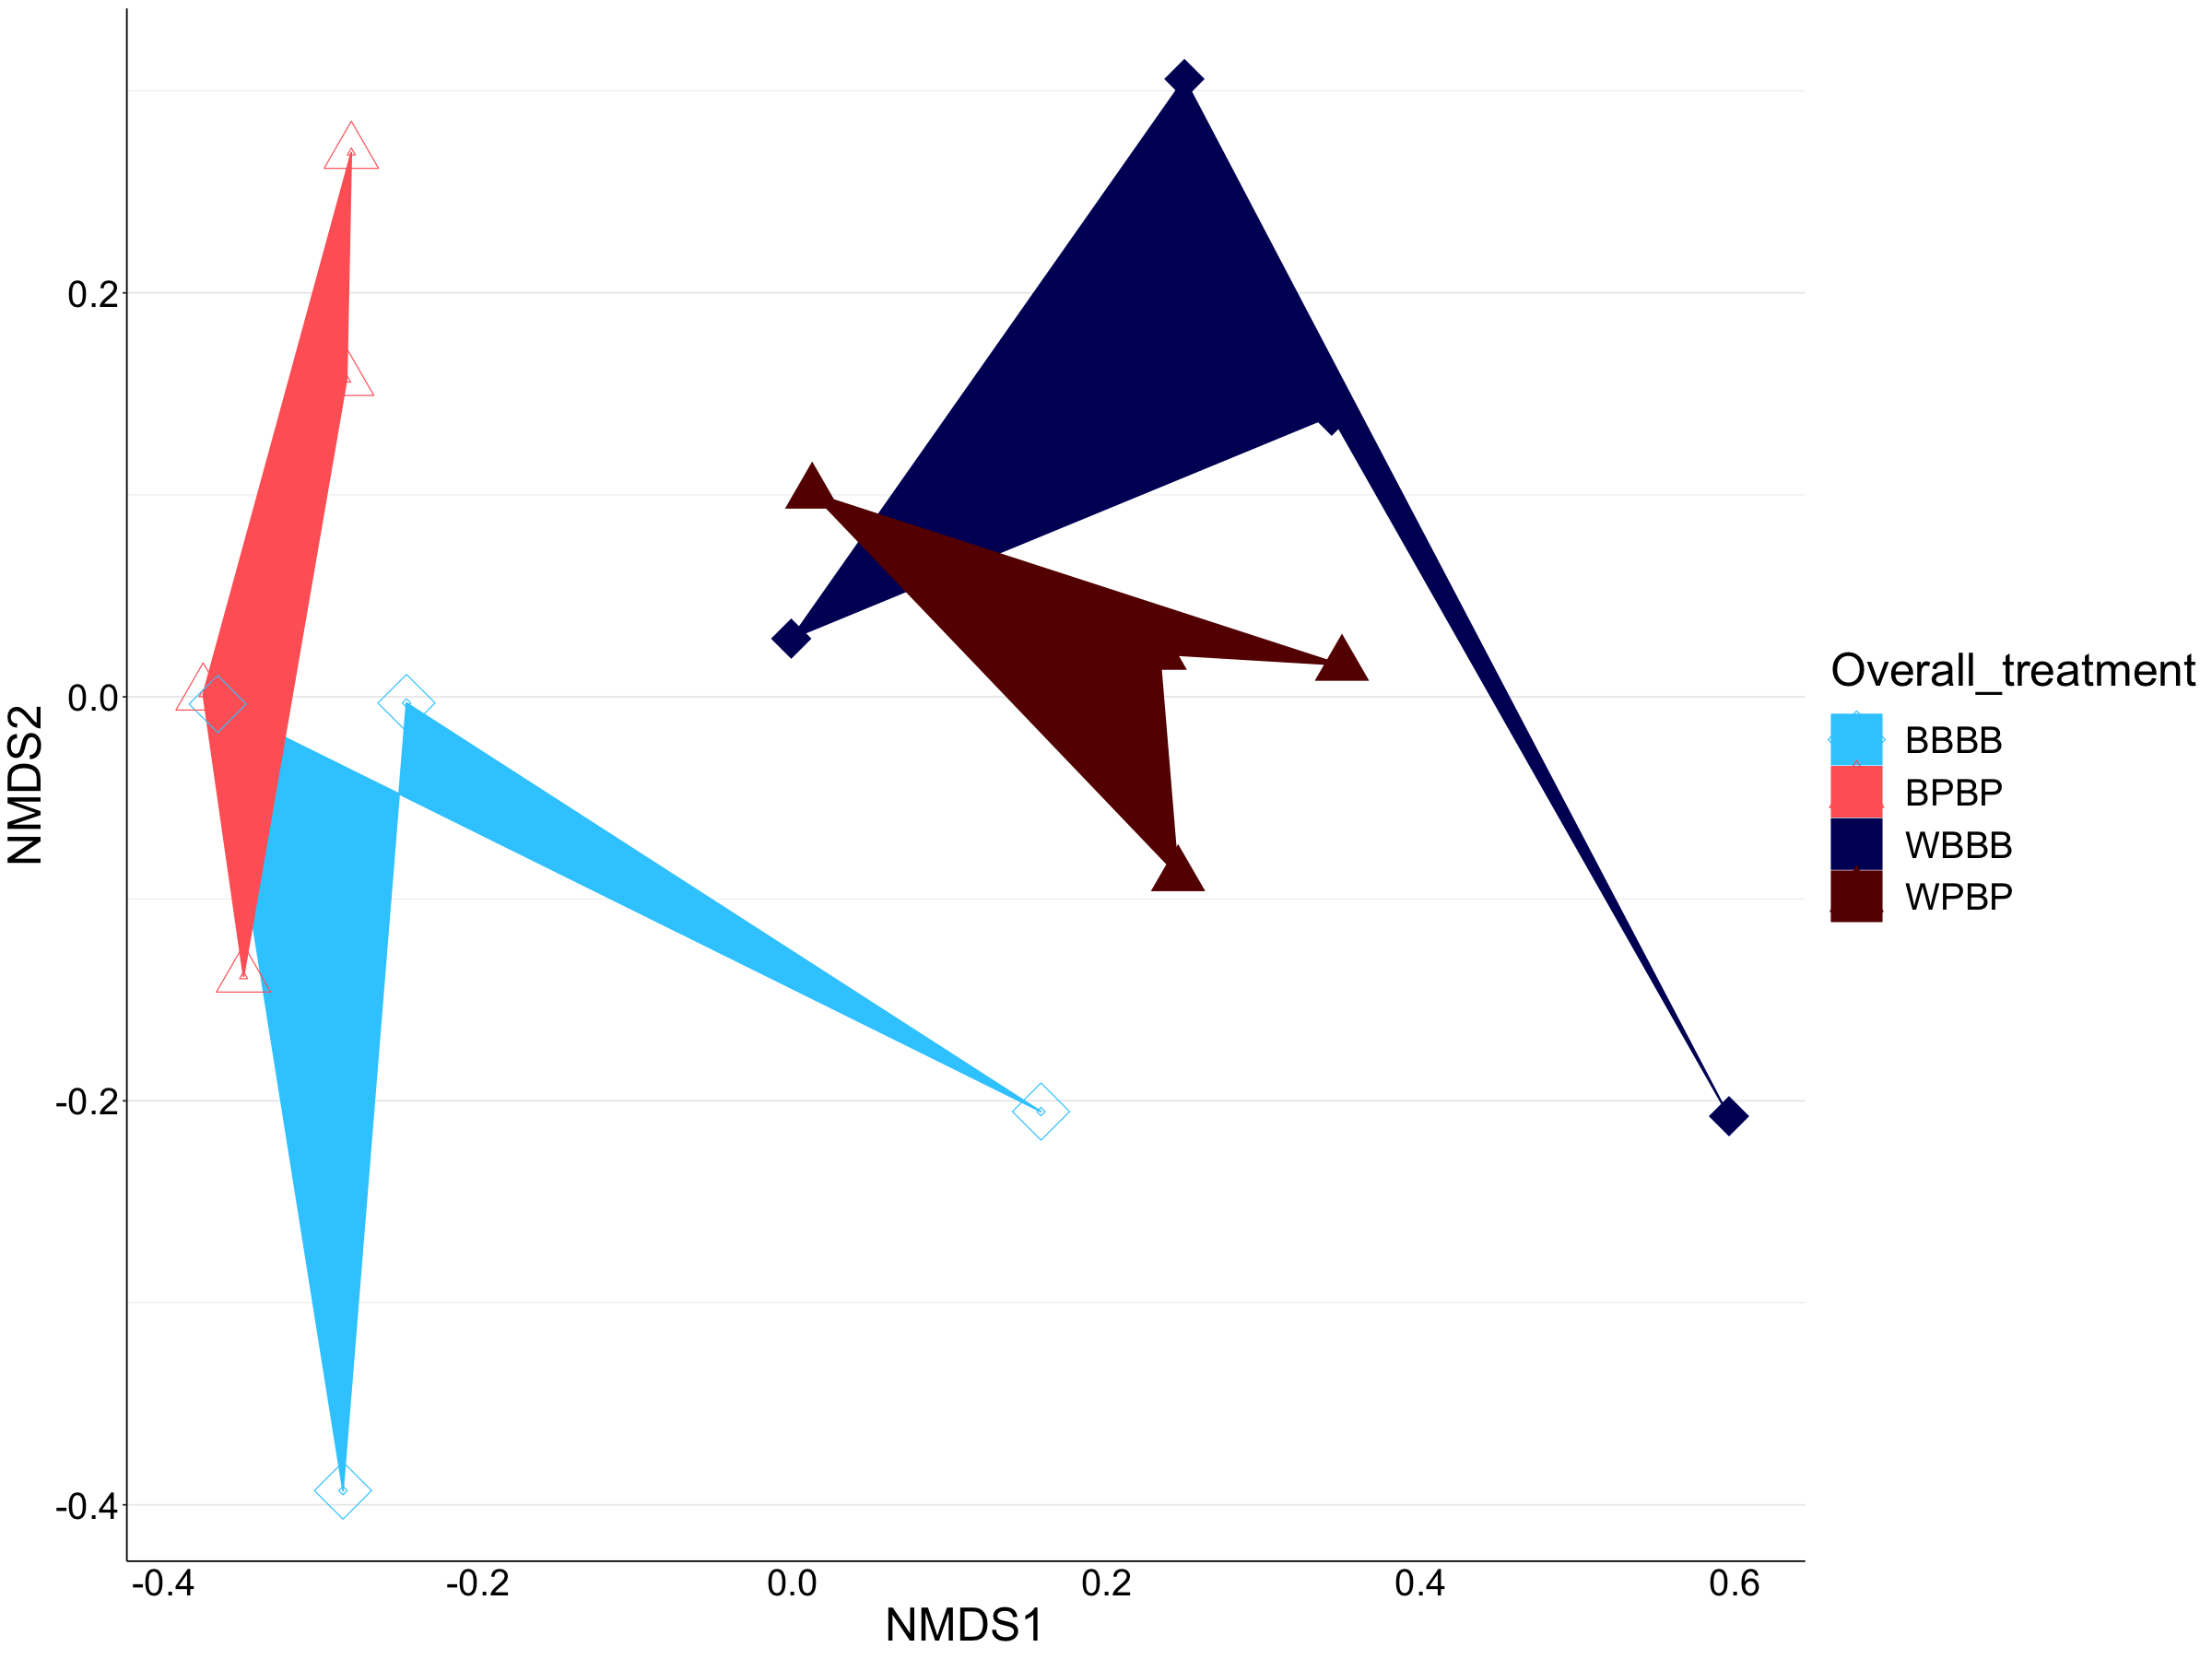

In [69]:
plot_ordination(CE, CE.ord, type="samples", color="Overall_treatment", shape="Overall_treatment")+ 
geom_polygon(aes(fill=Overall_treatment))+ 
geom_point(size=12)+
theme_bw()+
scale_color_manual(values=c("#33CCFF","#FF6666", "#000066", "#660000" ))+
scale_fill_manual(values=c("#33CCFF","#FF6666", "#000066", "#660000"  ))+

scale_shape_manual(values=c(5, 2, 18, 17))+

 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [72]:
ggsave(width=10, height=8, file="~/Documents/DE/DE_16S/CEnMDS.pdf")

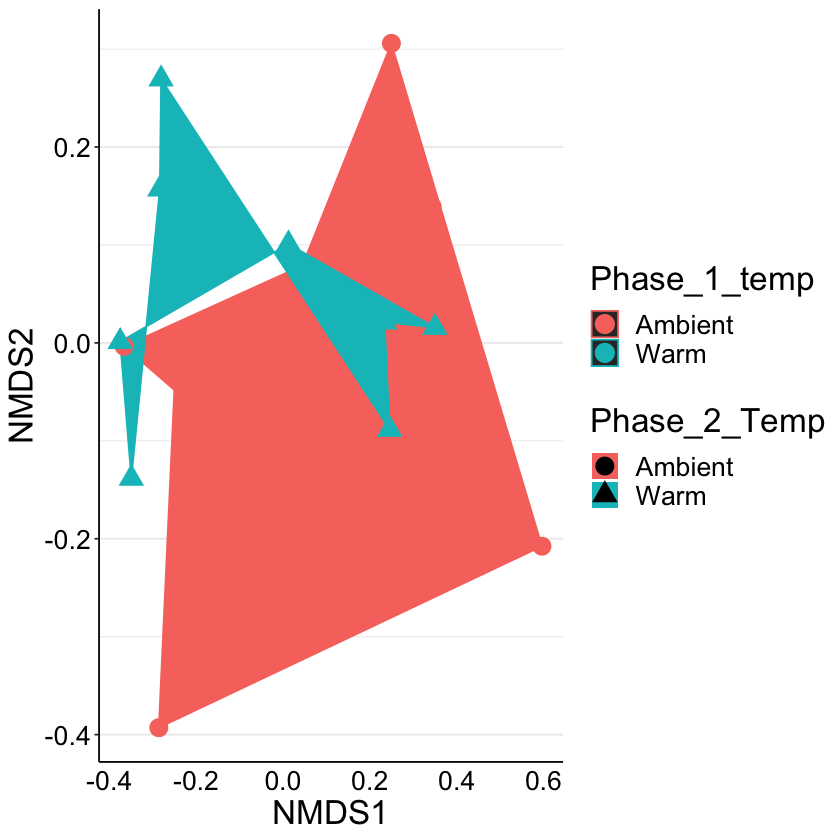

In [30]:
plot_ordination(CE, CE.ord, type="samples", color="Phase_1_temp", shape="Phase_2_Temp")+ 
geom_polygon(aes(fill=Phase_2_Temp))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

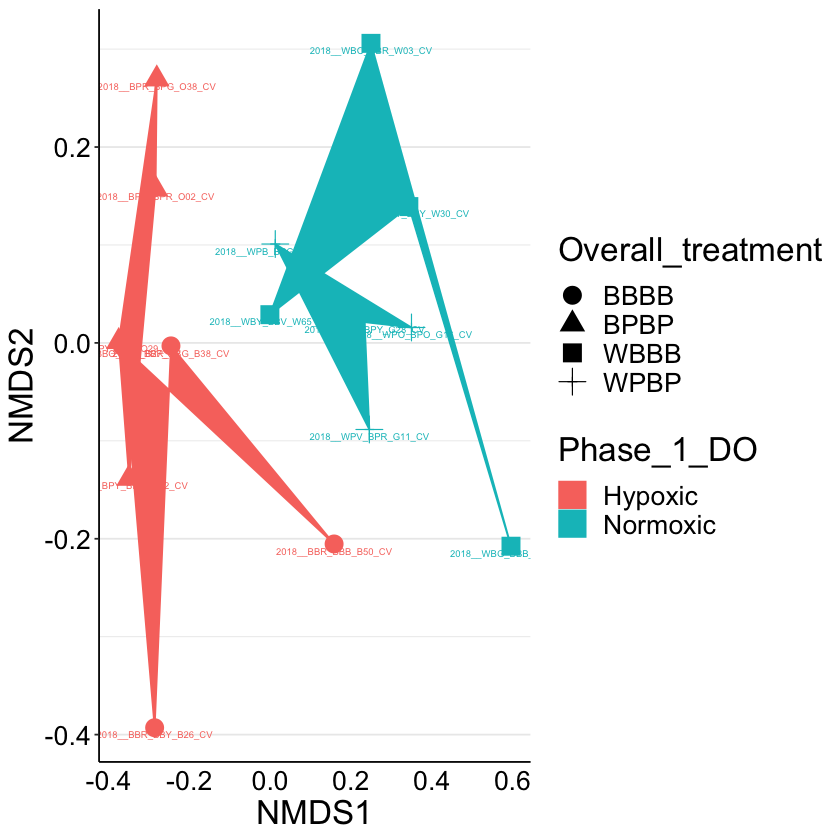

In [29]:
plot_ordination(CE, CE.ord, type="Samples", color="Phase_1_DO", shape="Overall_treatment", label="UniqueID")+ 
geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

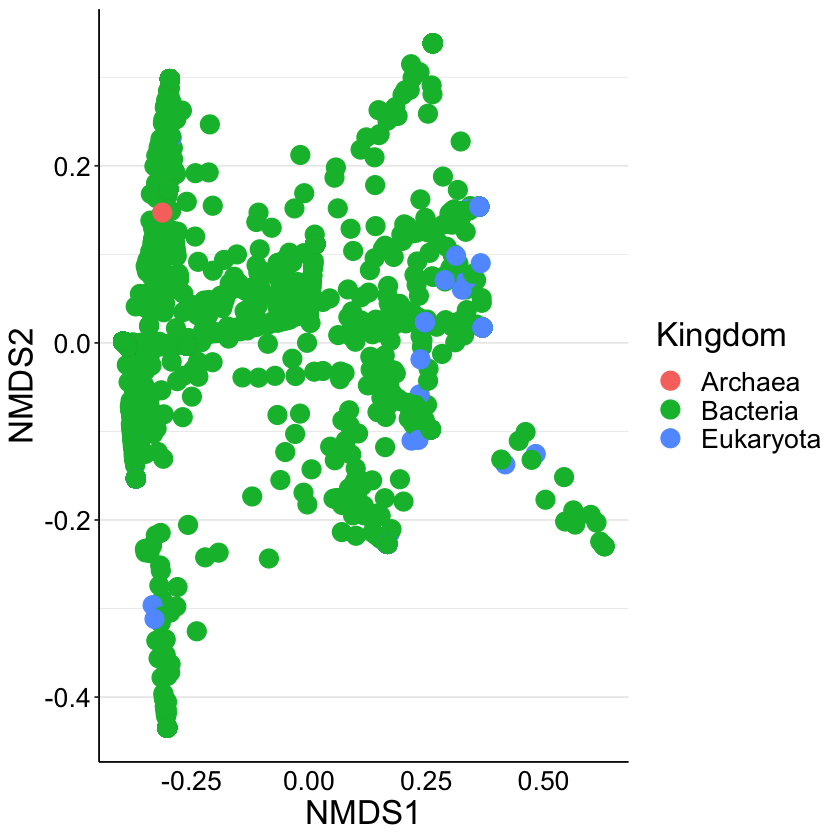

In [30]:
plot_ordination(CE, CE.ord, type="Taxa", color="Kingdom")+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

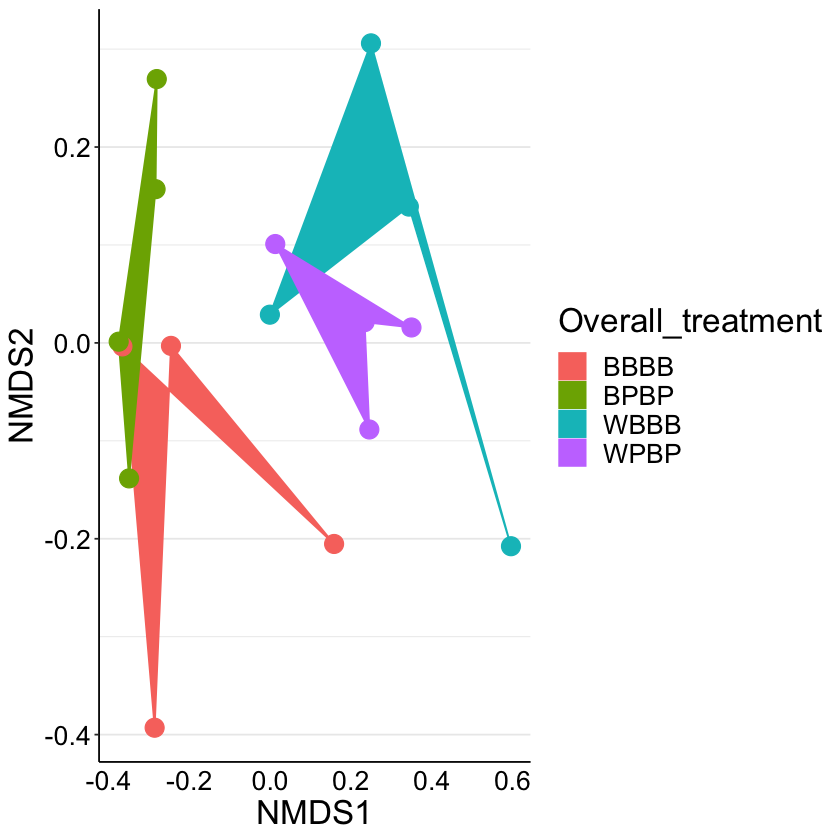

In [31]:
plot_ordination(CE, CE.ord, type="samples", color="Overall_treatment")+ 
geom_polygon(aes(fill=Overall_treatment))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


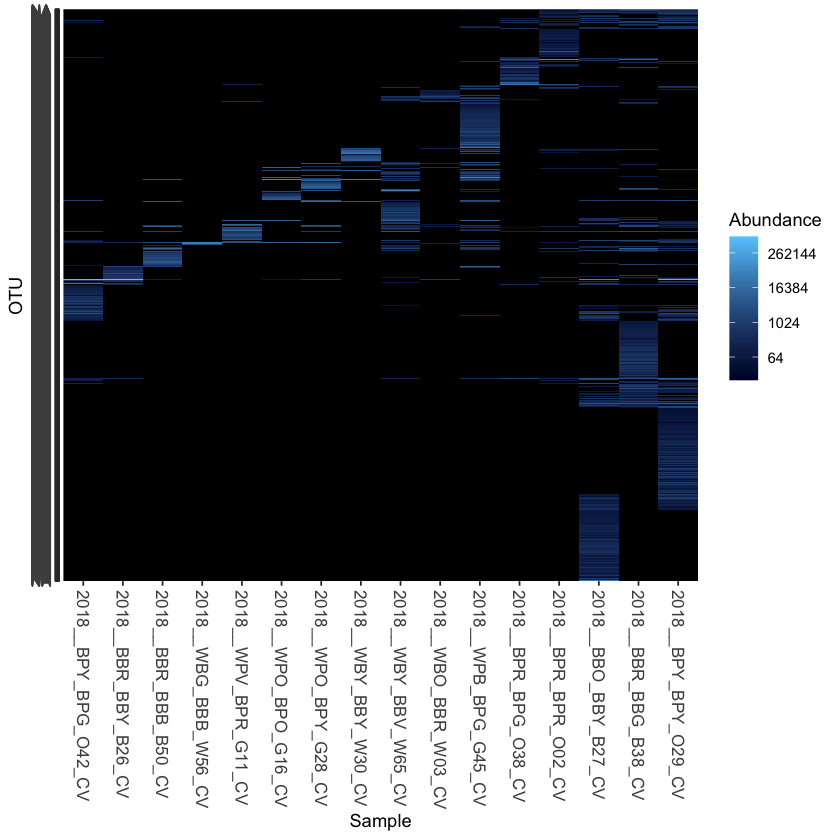

In [326]:
plot_heatmap(physeq, taxa.label="Phylum")

Warning message:
“Transformation introduced infinite values in discrete y-axis”


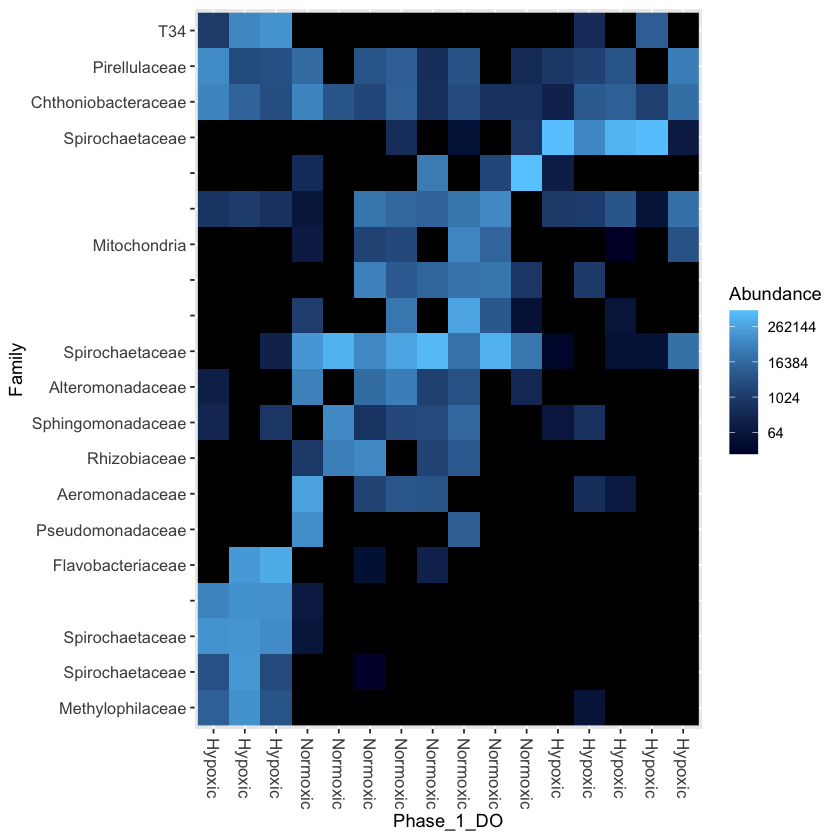

In [32]:
CE_bac20 = subset_taxa(CE, Kingdom=="Bacteria")
CE_bac20 = prune_taxa(names(sort(taxa_sums(CE_bac20),TRUE)[1:20]), CE_bac20)
plot_heatmap(CE_bac20, "NMDS", "bray", "Phase_1_DO", "Family")

In [349]:
?subset_taxa

In [327]:
#top5 phyla?
phylum.sum = tapply(taxa_sums(physeq), tax_table(physeq)[, "Phylum"], sum, na.rm=TRUE)
top5phyla = names(sort(phylum.sum, TRUE))[1:5]
physeq2 = prune_taxa((tax_table(physeq)[, "Phylum"] %in% top5phyla), physeq)

Warning message:
“Transformation introduced infinite values in discrete y-axis”


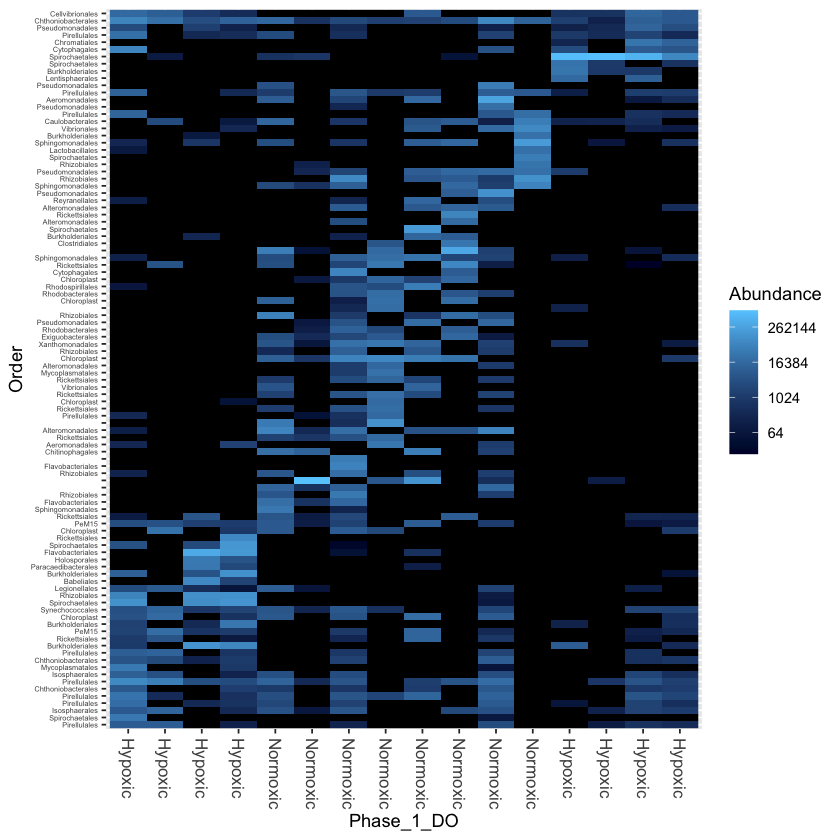

In [383]:
plot_heatmap(CE_bac100, "NMDS", "bray", "Phase_1_DO", "Order")

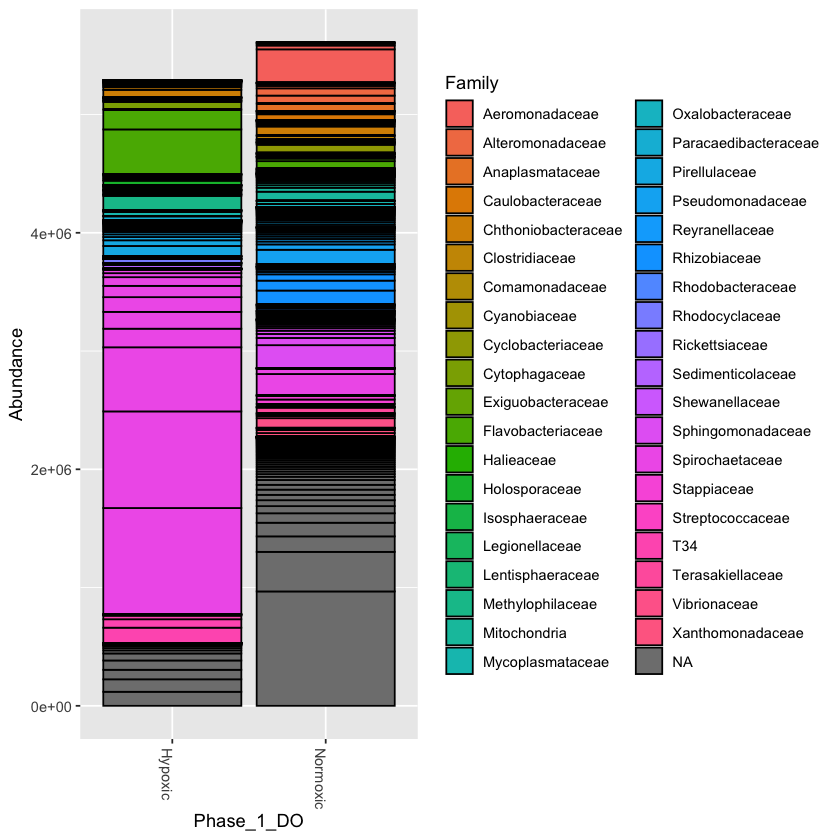

In [388]:
plot_bar(CE_bac100, "Phase_1_DO", fill = "Family")

In [15]:
mycolors= c('#1B9E77','#847B36','#CD6015','#966A77','#CD3893','#8E60A9','#BC5266','#74982A','#9EA811','#E6AB02')

In [75]:
CE_100 = prune_taxa(names(sort(taxa_sums(CE),TRUE)[1:100]), CE)


In [80]:
require(RColorBrewer)


Loading required package: RColorBrewer



In [83]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(35)


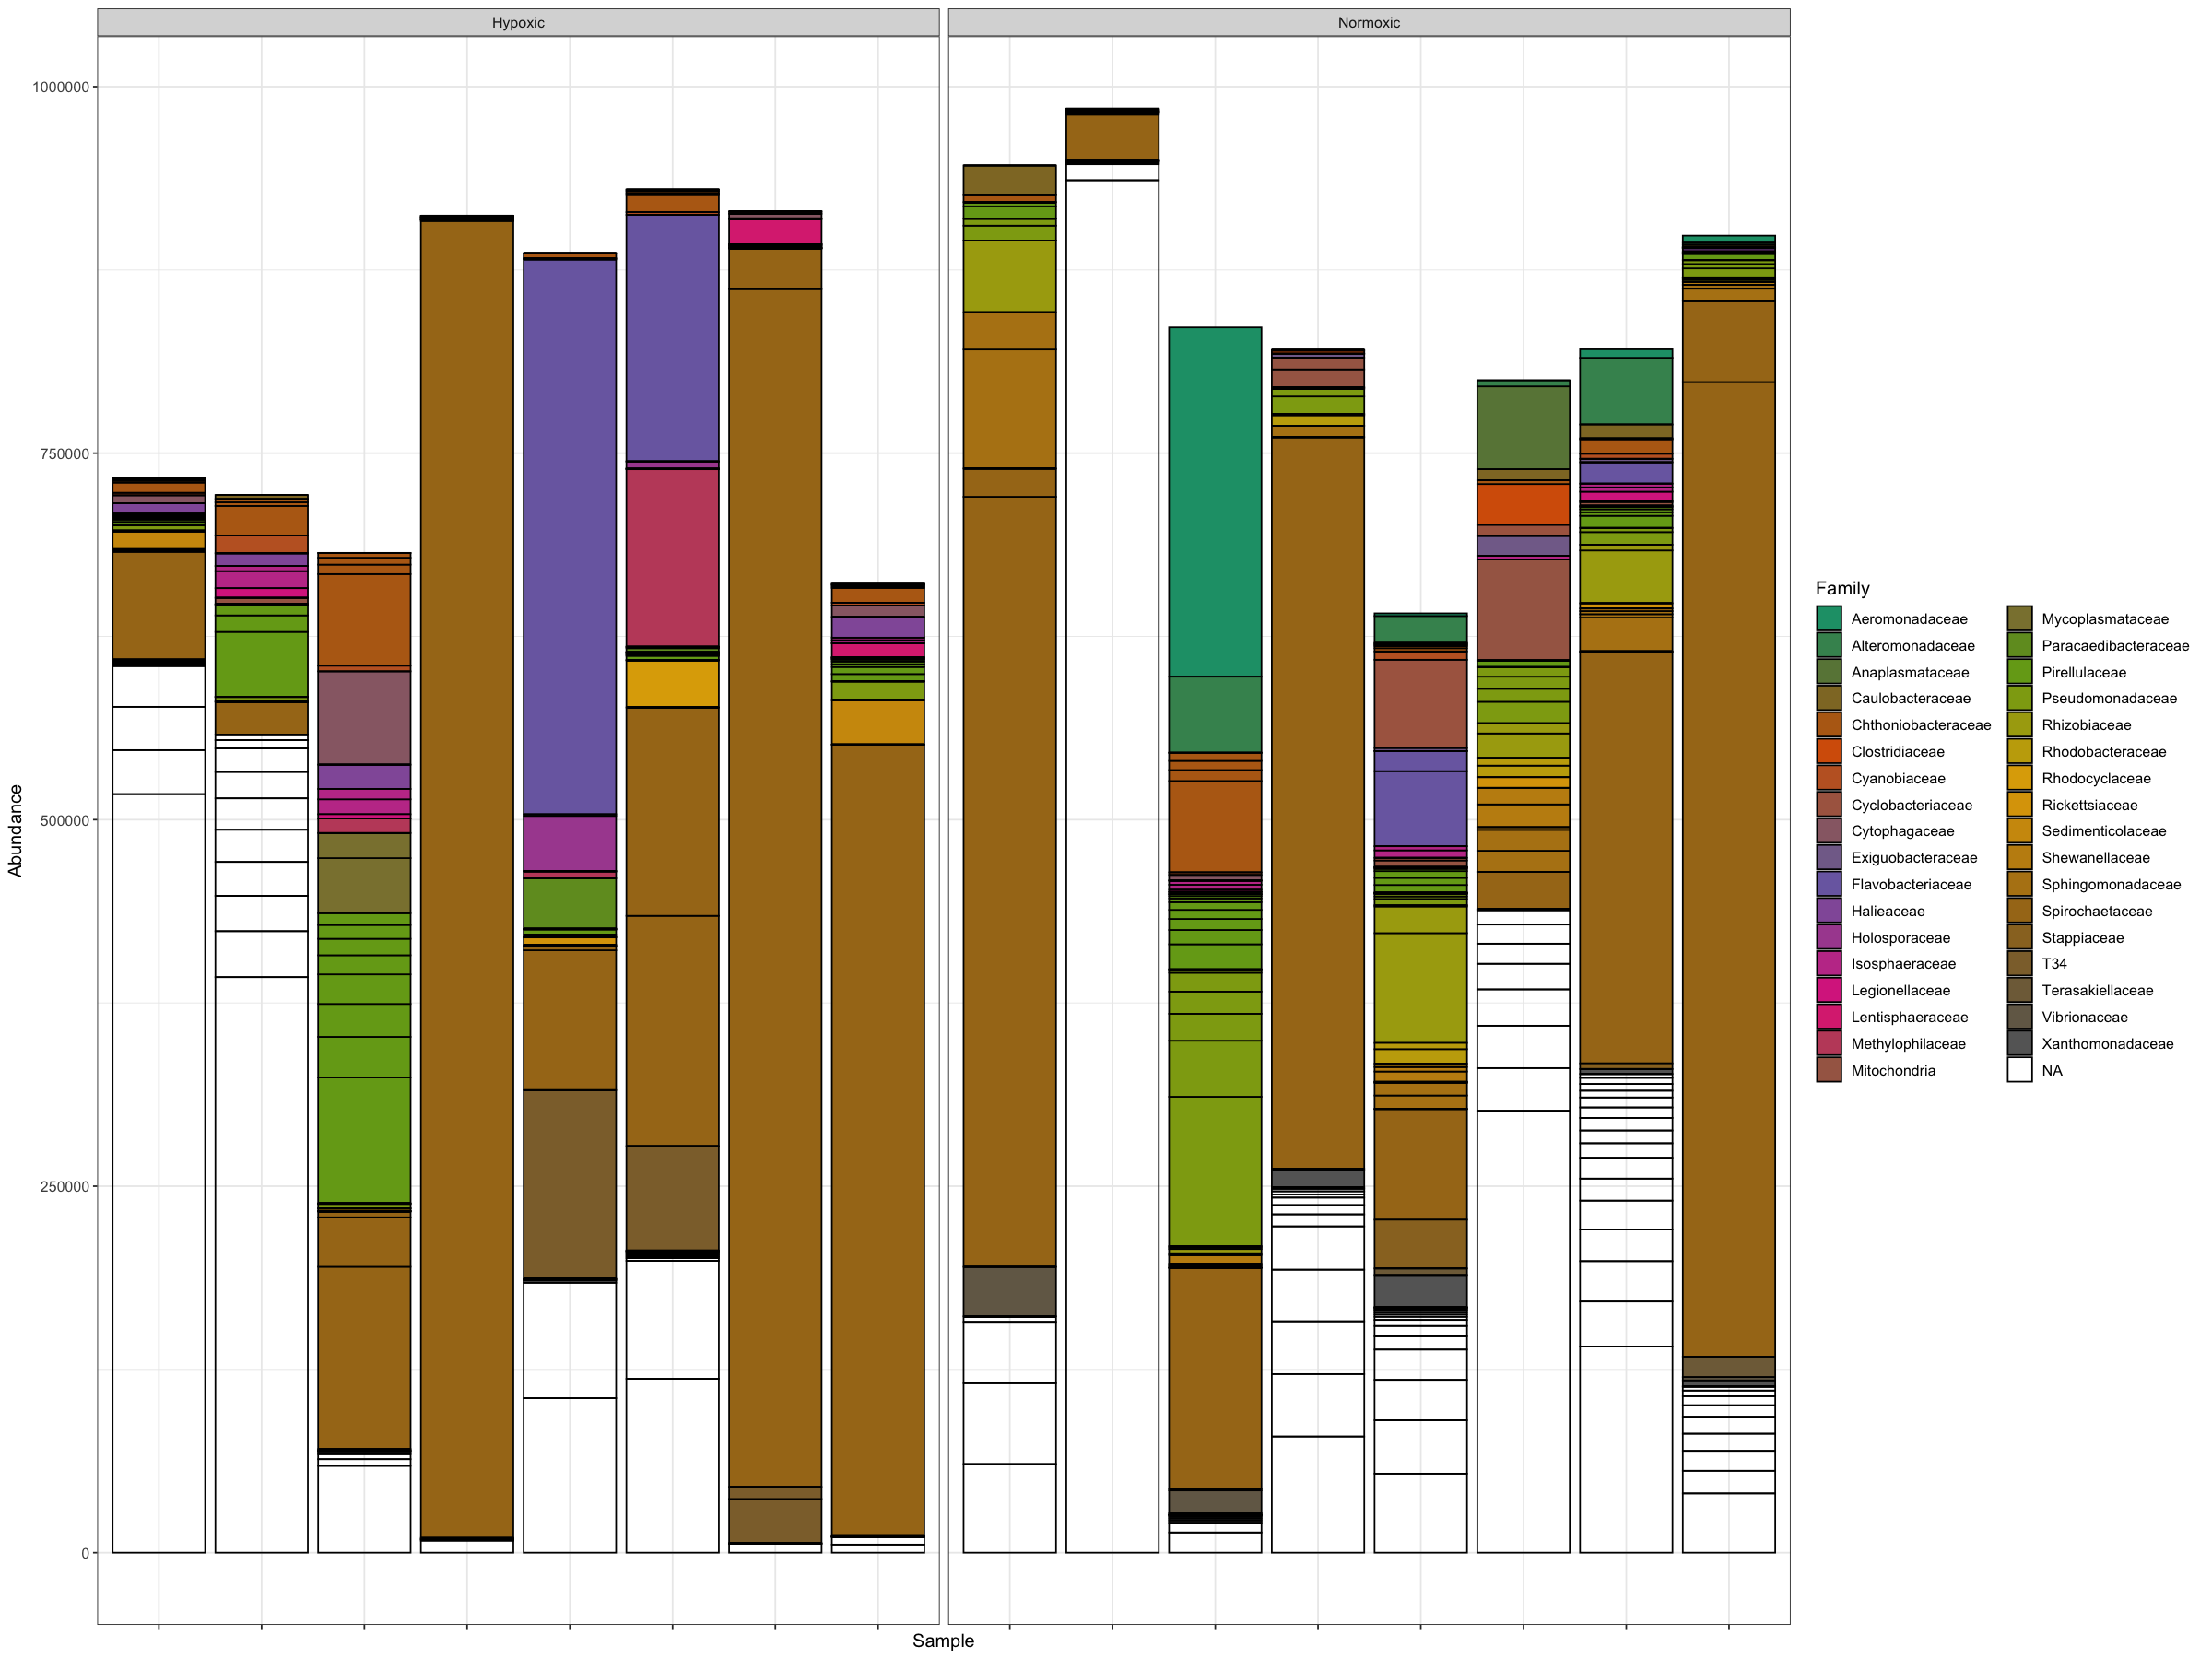

In [85]:
plot_bar(CE_100, fill="Family")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
theme(legend.position = "right", text = element_text(size=12), axis.text.x = element_blank())


In [86]:
ggsave(width=10, height=8, file="~/Documents/DE/DE_16S/CEtop100.pdf")

In [73]:
CE_Spiro = subset_taxa(CE, Phylum=="Spirochaetota")
CE_Spirof = filter_taxa(CE_Spiro, function(x) mean(x) > 500, TRUE)

In [74]:
(CE_Spirof)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 9 taxa by 6 taxonomic ranks ]

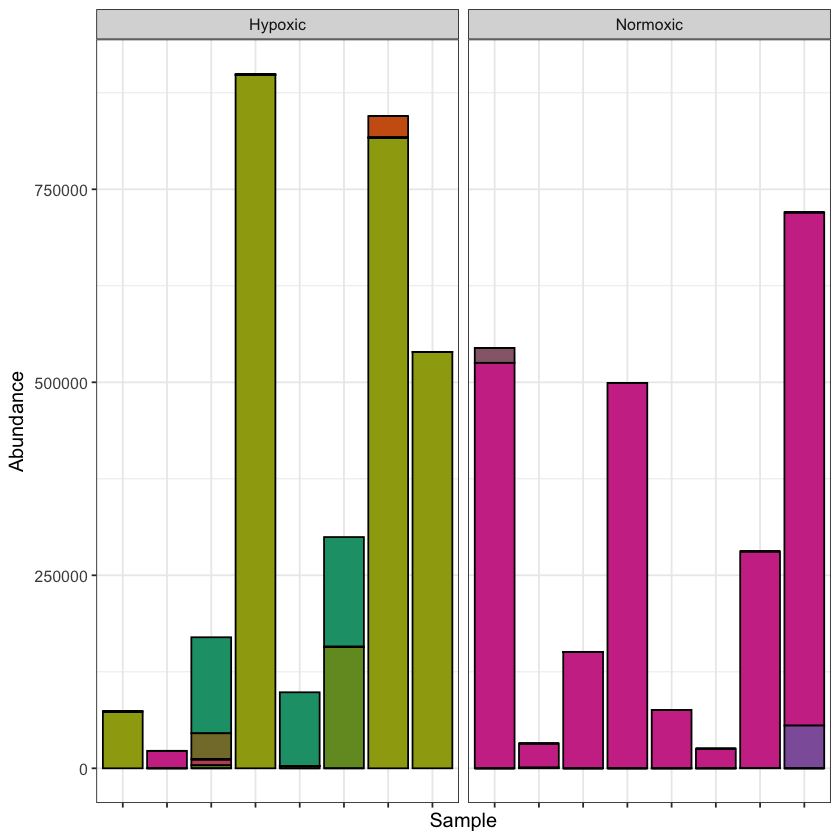

In [28]:

plot_bar(CE_Spirof, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
theme(legend.position = "none", text = element_text(size=12), axis.text.x = element_blank())


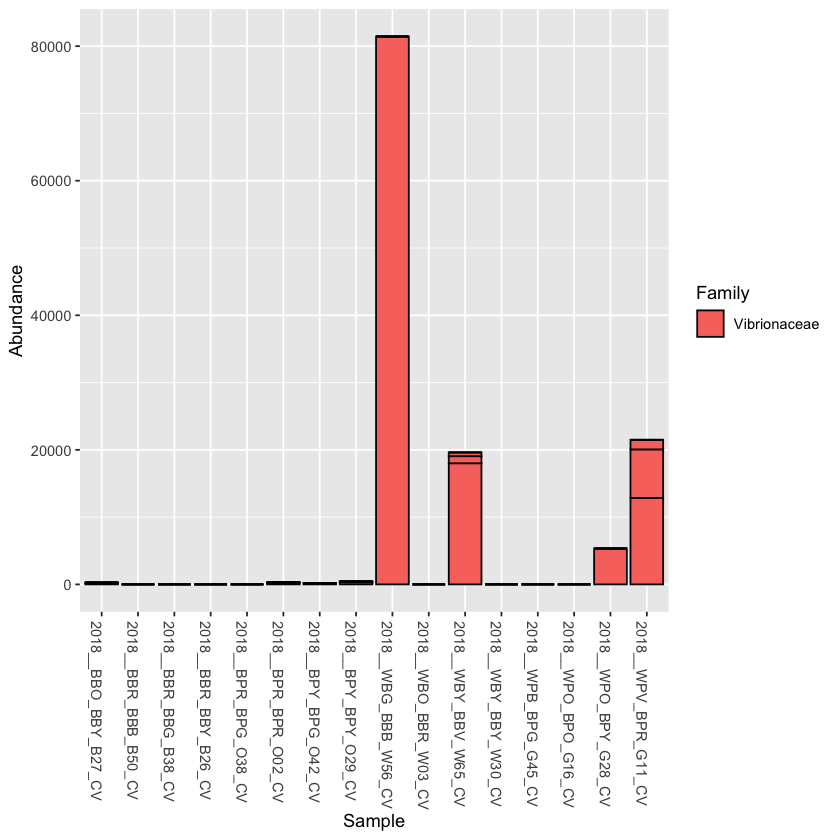

In [361]:
CE_Vibrio = subset_taxa(CE, Order=="Vibrionales")
plot_bar(CE_Vibrio, fill="Family")

In [369]:
TAX

Kingdom  
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                       Bacteria 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                     Bacteria 
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGCTGTCCAAGTCAGGGGTGAAAGCCCGCGGCTCAACCGCGGAACTGCCCTTGAAACTGGACGGCTTGAACACGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACTCACTGGACCGTAGTTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG                                                                                                                                                                       Bacteria 
TACGGAGGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTACGTAGGTGGTTTGGTAAGTCAGAGGTGAAATACGGTAGCTTAACTATCGAATTGCCTTTGATACTATTAAACTTGAGTTCTATTGAGGTAGACGGAATTGATAGTGTAGCGGTGAAATGCATAGATACTATCAGGAACACCAATTGCGAAGGCAGTTTACTAAATAGACACTGACACTAAAGTACGAAGGCGTGGGTAGCAAACAGG                                                                                                                                                                       Bacteria 
TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG                                                                                                                                                                       Bacteria 
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG                                                                                                                                                                       Bacteria 
TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGATTATTAAGTCAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTATTAGTCTAGAGTCCGGGAGAGGTGAGTGGAATTCCTAGTGTAGAGGTGAAATTCGTAGATATTAGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGCCCGGTACTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG                                                                                                                                                                       Bacteria 
TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGATGTAAGTCGGGTGTGAAATCTCCAAGCTTAACTTGGAAACTGCACTCGATACTGCGTCGCTCGAGGACTGTAGAGGGCATTGGAATTCACGGTGTAGCAGTGAAATGCGTAGATATCGTGAGGAAGACCAGTGGCGAAGGCGAATGCCTGGGCAGTTCCTGACACTGAGGCACGAAGGCCAGGGGAGCAAACGGG                                                                                                                                                                       Bacteria 
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTGATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG                                                                                                                                                                       Bacteria 
TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAG

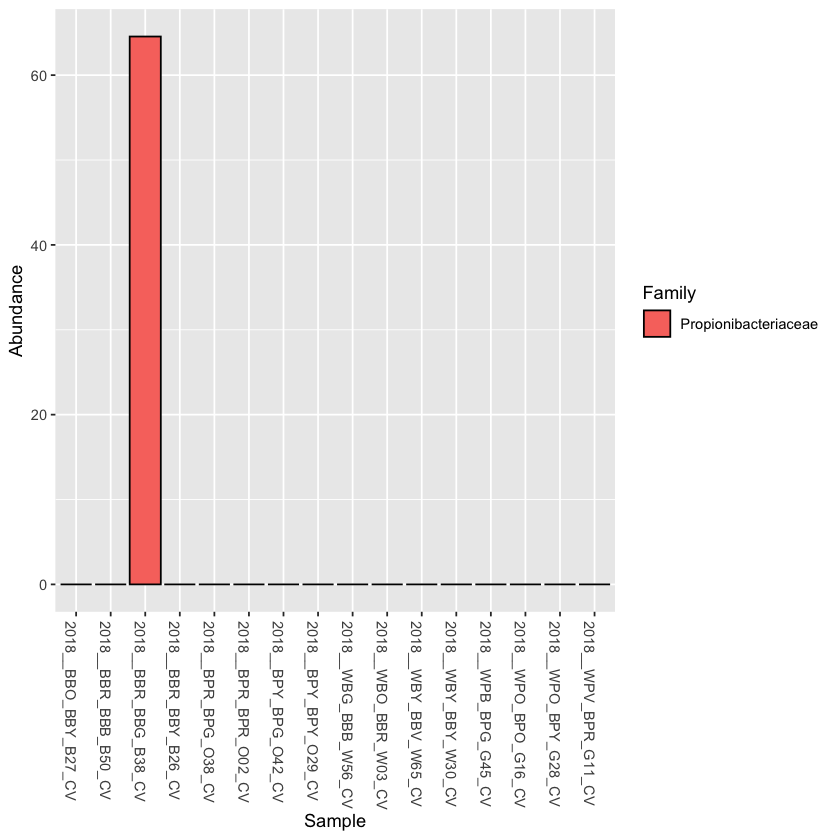

In [379]:
CE_Pro = subset_taxa(CE, Family=="Propionibacteriaceae")
plot_bar(CE_Pro, fill="Family")

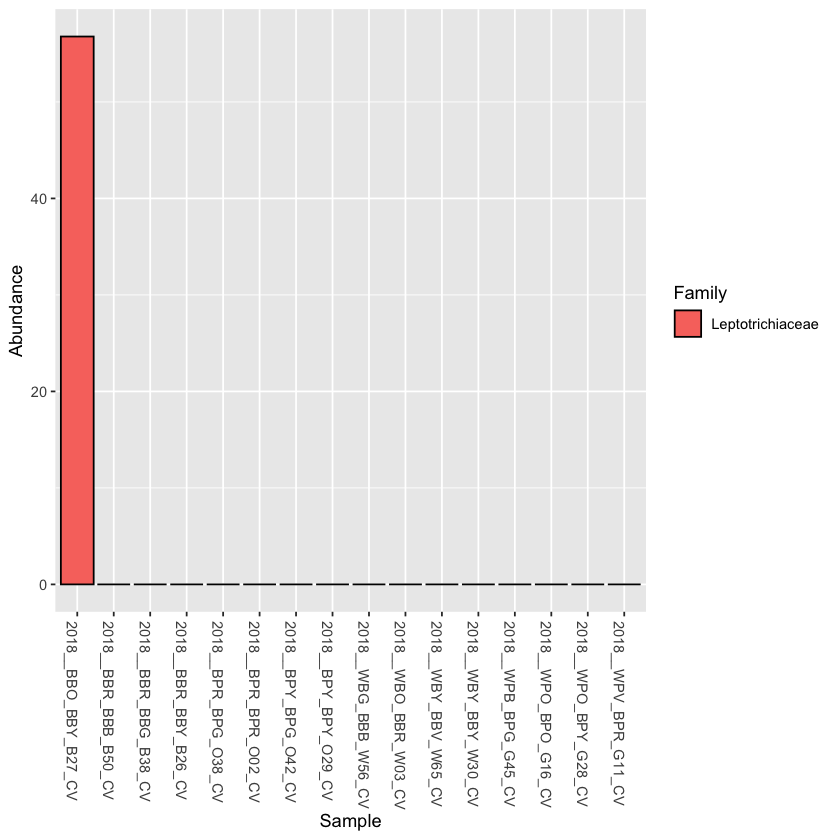

In [371]:
CE_Fuso = subset_taxa(CE, Order=="Fusobacteriales")
plot_bar(CE_Fuso, fill="Family")

In [ ]:
BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm
